## Ada Boosting

### 분류모델

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rc('font',family="Malgun Gothic")
plt.rcParams["axes.unicode_minus"]=False
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer()
x_train,x_test,y_train,y_test = train_test_split(cancer.data,
                                                 cancer.target,
                                                 random_state=0)
#데이터 수집, 분할

In [3]:
ada = AdaBoostClassifier(n_estimators=100,random_state=42)
#모델 생성, 100개의 트리, 42번 시드

In [4]:
ada.fit(x_train,y_train)
#모델 학습

AdaBoostClassifier(n_estimators=100, random_state=42)

In [5]:
ada.score(x_train,y_train)
#분류모델이므로 model.score() 기준은 Accuracy

1.0

In [6]:
ada.score(x_test,y_test)
#분류모델이므로 model.score() 기준은 Accuracy

0.986013986013986

In [7]:
n_features =cancer.data.shape[1]

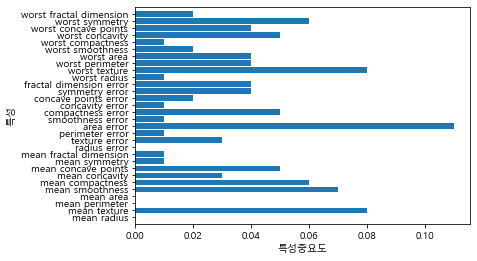

In [8]:
#특성중요도를 보여주는 그래프 시각화
plt.barh(range(n_features),ada.feature_importances_,align='center')
plt.yticks(np.arange(n_features),cancer.feature_names)
plt.xlabel('특성중요도')
plt.ylabel('특성')
plt.ylim(-1,n_features)
plt.show()

### 회귀모델

In [9]:
from sklearn.datasets import load_boston
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [10]:
boston = load_boston()
x_train,x_test,y_train,y_test = train_test_split(boston.data,
                                                boston.target,
                                                test_size=0.3)
#데이터 수집,분할

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [11]:
ada = AdaBoostRegressor(n_estimators=100,random_state=0)
#모델 선정, 트리 100개, 0번 시드

In [12]:
ada.fit(x_train,y_train)
#모델 학습

AdaBoostRegressor(n_estimators=100, random_state=0)

In [13]:
pred = ada.predict(x_test)
pred

array([12.96428571, 12.03414634, 18.52553191, 17.39833333, 46.98852459,
       17.85263158, 27.59658537, 18.77864078, 20.48390805, 34.04545455,
       11.85      , 23.8671875 , 22.3       , 20.63333333, 45.371875  ,
       19.21288344, 28.08502994, 26.31825397, 11.22545455, 20.43636364,
       11.96451613, 19.55443787, 13.1       , 15.7       , 21.47647059,
       20.63333333, 20.43636364, 11.16315789, 17.6       , 25.52121212,
       27.43021978, 26.63971631, 14.95833333, 21.64234234, 28.08502994,
       26.17313433, 27.47970297, 25.52121212, 35.01971154, 15.48888889,
       28.11948052, 26.31825397, 20.48390805, 29.0552    , 29.58823529,
       27.88211921, 26.17428571, 33.82916667, 21.78125   , 33.65390625,
       45.371875  , 24.18721461, 20.06315789, 17.7       , 23.8671875 ,
       22.7537037 , 11.971875  , 20.48390805, 20.61967213, 43.81      ,
       20.48059701, 28.72871795, 12.41639344, 11.7983871 , 13.0475    ,
       16.11111111, 28.16909091, 20.35555556, 24.79302326, 13.04

In [14]:
ada.score(x_train,y_train)

0.9155228401572902

In [15]:
ada.score(x_test,y_test)
#회귀모델이므로 model.score()의 기준 = r2_score

0.8224442477212422

## Gradient Boosting

### 분류모델

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

In [17]:
cancer = load_breast_cancer()
x_train,x_test,y_train,y_test = train_test_split(cancer.data,
                                                 cancer.target,
                                                 random_state=0)
#데이터 수집, 분할

In [18]:
gb = GradientBoostingClassifier(n_estimators=100,random_state=0)
#모델 선정,트리 100개,0번시드

In [19]:
gb.fit(x_train,y_train)
#모델 학습

GradientBoostingClassifier(random_state=0)

In [20]:
gb.score(x_train,y_train)
#분류모델이므로 model.score() 기준은 Accuracy

1.0

In [21]:
gb.score(x_test,y_test)
#분류모델이므로 model.score() 기준은 Accuracy

0.965034965034965

### 사전 가지치기

In [22]:
gb = GradientBoostingClassifier(random_state = 0, n_estimators = 100,
                               max_depth = 1)
#기존 Gradient 부스팅 모델에 max_depth 하이퍼파라미터 추가

In [23]:
gb.fit(x_train,y_train)
#모델 학습

GradientBoostingClassifier(max_depth=1, random_state=0)

In [24]:
gb.score(x_train,y_train)
#분류모델이므로 model.score() 기준은 Accuracy

0.9906103286384976

In [25]:
gb.score(x_test,y_test)
#분류모델이므로 model.score() 기준은 Accuracy

0.972027972027972

### 학습률 낮추기

In [26]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=0,
                               learning_rate=0.01)
#기존 Gradient 부스팅에서 learning_rate 하이퍼 파라미터를 추가해 학습률 조정

In [27]:
gb.fit(x_train,y_train)
#모델 학습

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [28]:
gb.score(x_train,y_train)
#분류모델이므로 model.score() 기준은 Accuracy

0.9882629107981221

In [29]:
gb.score(x_test,y_test)
#분류모델이므로 model.score() 기준은 Accuracy

0.965034965034965

### 회귀모델

In [30]:
boston = load_boston()
x_train,x_test,y_train,y_test = train_test_split(boston.data,
                                                boston.target,
                                                test_size=0.3)
#데이터 수집,분할

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

In [32]:
gb = GradientBoostingRegressor(n_estimators=100,
                               random_state=0,
                              criterion='mse')
#모델 학습, 트리 100개, 0번 시드, 오차를 줄이기위한 지표(criterion) = mse

In [33]:
gb.fit(x_train,y_train)
#모델 학습

C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:471: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: F

GradientBoostingRegressor(criterion='mse', random_state=0)

In [34]:
pred = gb.predict(x_test)
pred

array([22.83587373, 14.31363856, 42.26472406, 19.98168418, 20.55795137,
       28.64632959, 10.7164367 , 20.3533835 , 19.46497185, 16.6051054 ,
       20.39265665,  7.79324353, 34.38245333, 19.04777003, 13.58903693,
       23.95455246, 31.04811949, 16.84437399, 33.2253058 , 24.9795885 ,
       17.01903539, 19.02137792, 17.26273649, 13.70554584, 14.63531787,
       31.62355261, 23.5919438 , 16.73107513, 20.56842195, 32.83946703,
       33.61150655, 43.72252959, 18.45270347, 21.66023818, 13.81892189,
       33.41051503, 31.44229777, 18.12849506, 23.46138492, 32.04208385,
       22.52283466, 19.66464228, 12.02486756, 14.71622467, 25.84171294,
       27.20115412, 27.71469925, 20.56957767, 21.06758184, 22.2896685 ,
       20.21318089, 14.16905353, 16.2211166 , 18.47306555, 22.27074264,
       23.72191846, 45.32563779, 24.32533038, 20.69755935, 11.36836645,
       21.58351356, 19.60242907, 15.52402234, 42.0954391 , 20.20048509,
       22.66137869, 20.05525649,  6.73915962, 33.83906644, 23.88

In [35]:
gb.score(x_train,y_train)
#회귀모델이므로 model.score()의 기준 = r2_score

0.9828905738729614

In [36]:
gb.score(x_test,y_test)
#회귀모델이므로 model.score()의 기준 = r2_score

0.8278000836850291

## XGBoosting

### 분류모델

In [37]:
cancer = load_breast_cancer()
x_train,x_test,y_train,y_test = train_test_split(cancer.data,
                                                 cancer.target,
                                                 random_state=0)
#데이터 수집, 분할

!pip install xgboost
- 설치코드

In [38]:
import xgboost as xgb

In [39]:
xgb = xgb.XGBClassifier(random_state=0)
#모델 선정

In [40]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [41]:
pred = xgb.predict(x_test)
pred
#모델 예측

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [42]:
xgb.score(x_train,y_train)
#분류모델이므로 model.score() 기준은 Accuracy

1.0

In [43]:
xgb.score(x_test,y_test)
#분류모델이므로 model.score() 기준은 Accuracy

0.986013986013986

### 사전 가지치기

In [44]:
import xgboost as xgb

In [45]:
xgb = xgb.XGBClassifier(random_state=0,max_depth=1)
#모델 선정, 기존 모델에 max_depth 추가

In [46]:
xgb.fit(x_train,y_train)
#모델 학습

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=1, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [47]:
pred = xgb.predict(x_test)
pred
#모델 예측

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [48]:
xgb.score(x_train,y_train)
#분류모델이므로 model.score() 기준은 Accuracy

0.9976525821596244

In [49]:
xgb.score(x_test,y_test)
#분류모델이므로 model.score() 기준은 Accuracy

0.986013986013986

### 학습률 낮추기

In [50]:
import xgboost as xgb

In [51]:
xgb = xgb.XGBClassifier(random_state=0,learning_rate=0.01)
#모델 선정, 기존 모델에 learning_rate 추가하여 학습률 조정

In [52]:
xgb.fit(x_train,y_train)
#모델 학습

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [53]:
pred = xgb.predict(x_test)
pred
#모델 예측

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [54]:
xgb.score(x_train,y_train)
#분류모델이므로 model.score() 기준은 Accuracy

0.9953051643192489

In [55]:
xgb.score(x_test,y_test)
#분류모델이므로 model.score() 기준은 Accur

0.965034965034965

### 회귀모델

In [56]:
boston = load_boston()
x_train,x_test,y_train,y_test = train_test_split(boston.data,
                                                boston.target,
                                                test_size=0.3)
#데이터 수집,분할

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [57]:
import xgboost as xgb

In [58]:
r = xgb.XGBRegressor(n_estimators=100, learning_rate=0.01,
                    gamma=0, max_depth=3,random_state=0)
#모델 선정
#100개의 트리,학습률 0.01, 0번시드

In [59]:
r.fit(x_train,y_train)
#모델 학습

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

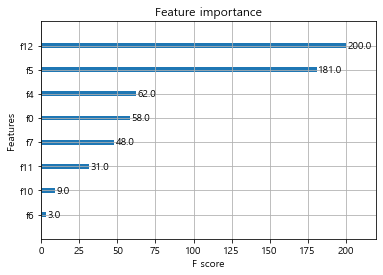

In [60]:
#특성중요도를 시각화하기 위한 그래프
xgb.plot_importance(r)

In [61]:
pred = r.predict(x_test)
pred
#예측값 산출

array([15.46302  , 15.516097 , 11.061654 , 11.852107 , 10.369858 ,
       14.750596 , 13.648107 , 14.750596 , 28.882225 , 17.199392 ,
       16.870583 , 11.417551 , 16.870583 ,  7.453892 , 16.229898 ,
       11.549519 , 13.169251 , 27.747072 , 10.277534 , 15.692105 ,
       19.000164 , 11.476816 , 15.446939 , 13.244722 , 10.783131 ,
       18.509815 , 10.060974 ,  9.799319 , 13.503477 , 15.516097 ,
       13.648107 , 13.033164 , 13.957148 , 11.7342415, 21.340248 ,
       10.718425 ,  7.161585 ,  8.351408 , 20.067154 , 10.119064 ,
       13.169251 , 14.605967 , 10.311232 , 20.93955  , 13.033164 ,
        8.152153 ,  9.382362 , 18.045036 , 15.516097 , 15.516097 ,
       21.620708 , 17.099237 , 28.882225 ,  6.9092054,  9.50247  ,
        9.0476465,  7.161585 , 12.957693 , 20.678818 , 13.169251 ,
       15.516097 , 13.169251 , 12.957693 , 13.169251 , 10.311232 ,
       10.387165 , 13.503477 , 20.678818 , 13.648107 , 14.605967 ,
       10.369858 , 13.503477 , 11.476816 , 13.503477 , 14.7505

In [62]:
r.score(x_train,y_train)


-0.047434934976234855

In [63]:
r.score(x_test,y_test)

-0.20738273822676478

## Light GBM

!pip install lightgbm
- 설치 코드

### 분류모델

In [64]:
from lightgbm import LGBMClassifier
import mglearn

In [65]:
cancer = load_breast_cancer()
x_train,x_test,y_train,y_test = train_test_split(cancer.data,
                                                 cancer.target,
                                                 random_state=0)
#데이터 수집, 분할

In [66]:
lgb = LGBMClassifier(n_estimators=100,random_state=0)
#모델 선정, 트리 100개,0번 시드

In [67]:
lgb.fit(x_train,y_train)
#모델 학습

LGBMClassifier(random_state=0)

In [68]:
pred = lgb.predict(x_test)
pred
#예측값 산출

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0])

In [69]:
lgb.score(x_train,y_train)
#분류모델이기 때문에 model.score()의 기준은 Accuracy(정확도) 
#과대적합이 의심됨

1.0

In [70]:
lgb.score(x_test,y_test)
#분류모델이기 때문에 model.score()의 기준은 Accuracy(정확도) 

0.972027972027972

### 사전가지치기

In [71]:
lgb = LGBMClassifier(random_state=42, max_depth=1)
#모델 선정,42번 시드,max_depth = 1 추가

In [72]:
lgb.fit(x_train,y_train)
#모델 학습

LGBMClassifier(max_depth=1, random_state=42)

In [73]:
pred = lgb.predict(x_test)
pred
#예측값 산출

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [74]:
lgb.score(x_train,y_train)
#분류모델이기 때문에 model.score()의 기준은 Accuracy(정확도) 

0.9882629107981221

In [75]:
lgb.score(x_test,y_test)
#분류모델이기 때문에 model.score()의 기준은 Accuracy(정확도) 

0.965034965034965

### 학습률 낮추기

In [76]:
lgb = LGBMClassifier(random_state=42,learning_rate=0.01)
#모델 선정, 42번 시드, 학습률=0.01

In [77]:
lgb.fit(x_train,y_train)
#모델 학습

LGBMClassifier(learning_rate=0.01, random_state=42)

In [78]:
pred = lgb.predict(x_test)
pred
#예측값 산출

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0])

In [79]:
lgb.score(x_train,y_train)
#분류모델이기 때문에 model.score()의 기준은 Accuracy(정확도) 

0.9812206572769953

In [80]:
lgb.score(x_test,y_test)
#분류모델이기 때문에 model.score()의 기준은 Accuracy(정확도) 

0.958041958041958

### 특성중요도 시각화 

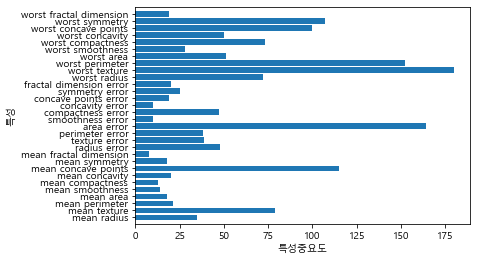

In [81]:
#특성중요도 시각화 코드
n_features = cancer.data.shape[1]
#데이터의 행의 개수
plt.barh(np.arange(n_features),lgb.feature_importances_, align='center')
plt.yticks(np.arange(n_features),cancer.feature_names)
plt.xlabel('특성중요도')
plt.ylabel('특성')
plt.ylim(-1,n_features)
plt.show()

### 회귀모델

In [82]:
boston = load_boston()
x_train,x_test,y_train,y_test = train_test_split(boston.data,
                                                boston.target,
                                                test_size=0.3)
#데이터 수집,분할

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [83]:
from lightgbm import LGBMRegressor
import xgboost

In [84]:
lgb = LGBMRegressor(n_estimators=100,learning_rate=0.01,
                    random_state=0,max_depth=3)
#모델 선정, 트리 100개,학습률 0.01, 0번시드 , 최대깊이 3

In [85]:
lgb.fit(x_train,y_train)

LGBMRegressor(learning_rate=0.01, max_depth=3, random_state=0)

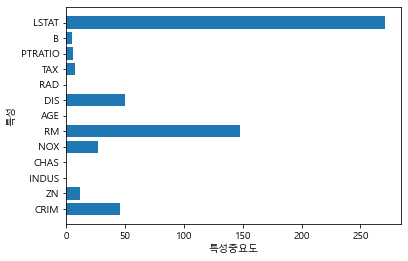

In [86]:
#특성중요도 시각화 코드
n_features = boston.data.shape[1]
#데이터의 행의 개수
plt.barh(np.arange(n_features),lgb.feature_importances_, align='center')
plt.yticks(np.arange(n_features),boston.feature_names)
plt.xlabel('특성중요도')
plt.ylabel('특성')
plt.ylim(-1,n_features)
plt.show()

In [87]:
pred = lgb.predict(x_test)
pred
#예측값 산출

array([19.00046452, 25.72410521, 20.85974119, 15.47963167, 19.67409348,
       22.65999129, 23.06742113, 22.79607426, 30.80273076, 19.26278514,
       20.93774028, 18.4399834 , 28.06172145, 21.58987396, 17.67344348,
       23.37892152, 19.10035212, 15.01972467, 16.96976609, 15.4066705 ,
       17.69420883, 21.56901403, 16.36345617, 21.7167296 , 35.58490412,
       21.38755221, 29.12503958, 36.28753092, 18.76365456, 20.14777227,
       17.69910679, 23.6077938 , 22.76483948, 28.09712892, 22.76483948,
       15.59356289, 21.38755221, 17.79387198, 16.37142942, 23.42114034,
       21.7167296 , 23.00133698, 21.26069656, 21.91446227, 19.67409348,
       22.76483948, 21.21847775, 37.43108065, 29.62942334, 15.47963167,
       18.95347342, 23.37892152, 23.6077938 , 27.06606323, 21.38755221,
       23.37892152, 18.45485891, 21.58987396, 17.71516091, 17.48705105,
       19.50260918, 19.88870023, 17.86602117, 24.49107807, 15.47963167,
       16.29852769, 26.55502832, 19.37545953, 27.34726267, 26.55

In [88]:
lgb.score(x_train,y_train)
#회귀모델이기 때문에 model.score()의 평가 지표는 r2_score

0.716809859360789

In [89]:
lgb.score(x_test,y_test)
#회귀모델이기 때문에 model.score()의 평가 지표는 r2_score

0.6725683548449286